

This notebook contains the work for Step 3 of the Data Science Method:

The Data Science Method

1.Problem Identification

2.Data Wrangling

         . Data Collection
         . Data Organization
         . Data Definition
         . Data Cleaning

3.Exploratory Data Analysis

   . Build data profile tables and plots

     - Outliers & Anomalies

   . Explore data relationships
   
   . Identification and creation of features</b>

1.Pre-processing and Training Data Development

       . Create dummy or indicator features for categorical variables
       . Standardize the magnitude of numeric features
       . Split into testing and training datasets
       . Apply scaler to the testing set

2.Modeling

       . Fit Models with Training Data Set
       . Review Model Outcomes — Iterate over additional models as needed.
       . Identify the Final Model
3.Documentation

       . Review the Results
       . Present and share your findings - storytelling
       . Finalize Code
       . Finalize Documentation



Overview

The datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 473 frauds out of 283253 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.17% of all transactions.

In [49]:
#load python packages
import os
import pandas as pd
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
from matplotlib import gridspec
from scipy.stats import chi2_contingency

Data Description

1.The datasets contains transactions made by credit cards in September 2013 by european cardholders. The transactions occur in two days.

2.Features V1, V2, ... V28 are the principal components obtained with PCA.

3.Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset.

4.The feature 'Amount' is the transaction Amount.

5.Feature 'Class' is the response variable and it takes value 1 in case of fraud and 0 otherwise.

In [3]:
pd.set_option('display.max_rows', 1500)

Read and Explore the data set

In [50]:
# load the data saved from step 2
df=pd.read_csv('C:\\Users\\arna_mora\\Springboard\\unit 7\\creditcard.csv')
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Build data profile tables and plots

In [51]:
# Print out the summary stats table
df.describe().T

,count,mean,std,min,25%,50%,75%,max
Time,283726.0,94811.077600,47481.047891,0.000000,54204.750000,84692.500000,139298.000000,172792.000000
V1,283726.0,0.005917,1.948026,-56.407510,-0.915951,0.020384,1.316068,2.454930
V2,283726.0,-0.004135,1.646703,-72.715728,-0.600321,0.063949,0.800283,22.057729
V3,283726.0,0.001613,1.508682,-48.325589,-0.889682,0.179963,1.026960,9.382558
V4,283726.0,-0.002966,1.414184,-5.683171,-0.850134,-0.022248,0.739647,16.875344
V5,283726.0,0.001828,1.377008,-113.743307,-0.689830,-0.053468,0.612218,34.801666
V6,283726.0,-0.001139,1.331931,-26.160506,-0.769031,-0.275168,0.396792,73.301626
V7,283726.0,0.001801,1.227664,-43.557242,-0.552509,0.040859,0.570474,120.589494
V8,283726.0,-0.000854,1.179054,-73.216718,-0.208828,0.021898,0.325704,20.007208
V9,283726.0,-0.001596,1.095492,-13.434066,-0.644221,-0.052596,0.595977,15.594995


Correlation matrix graphically gives us an idea of how features correlate with each other and can help us predict what are the features that are most relevant for the prediction. Finally, it would be interesting to know if there are any significant correlations between our predictors, especially with regards to our class variable. One of the most visually appealing ways to determine that is by using a heatmap.

Plotting the Correlation Matrix

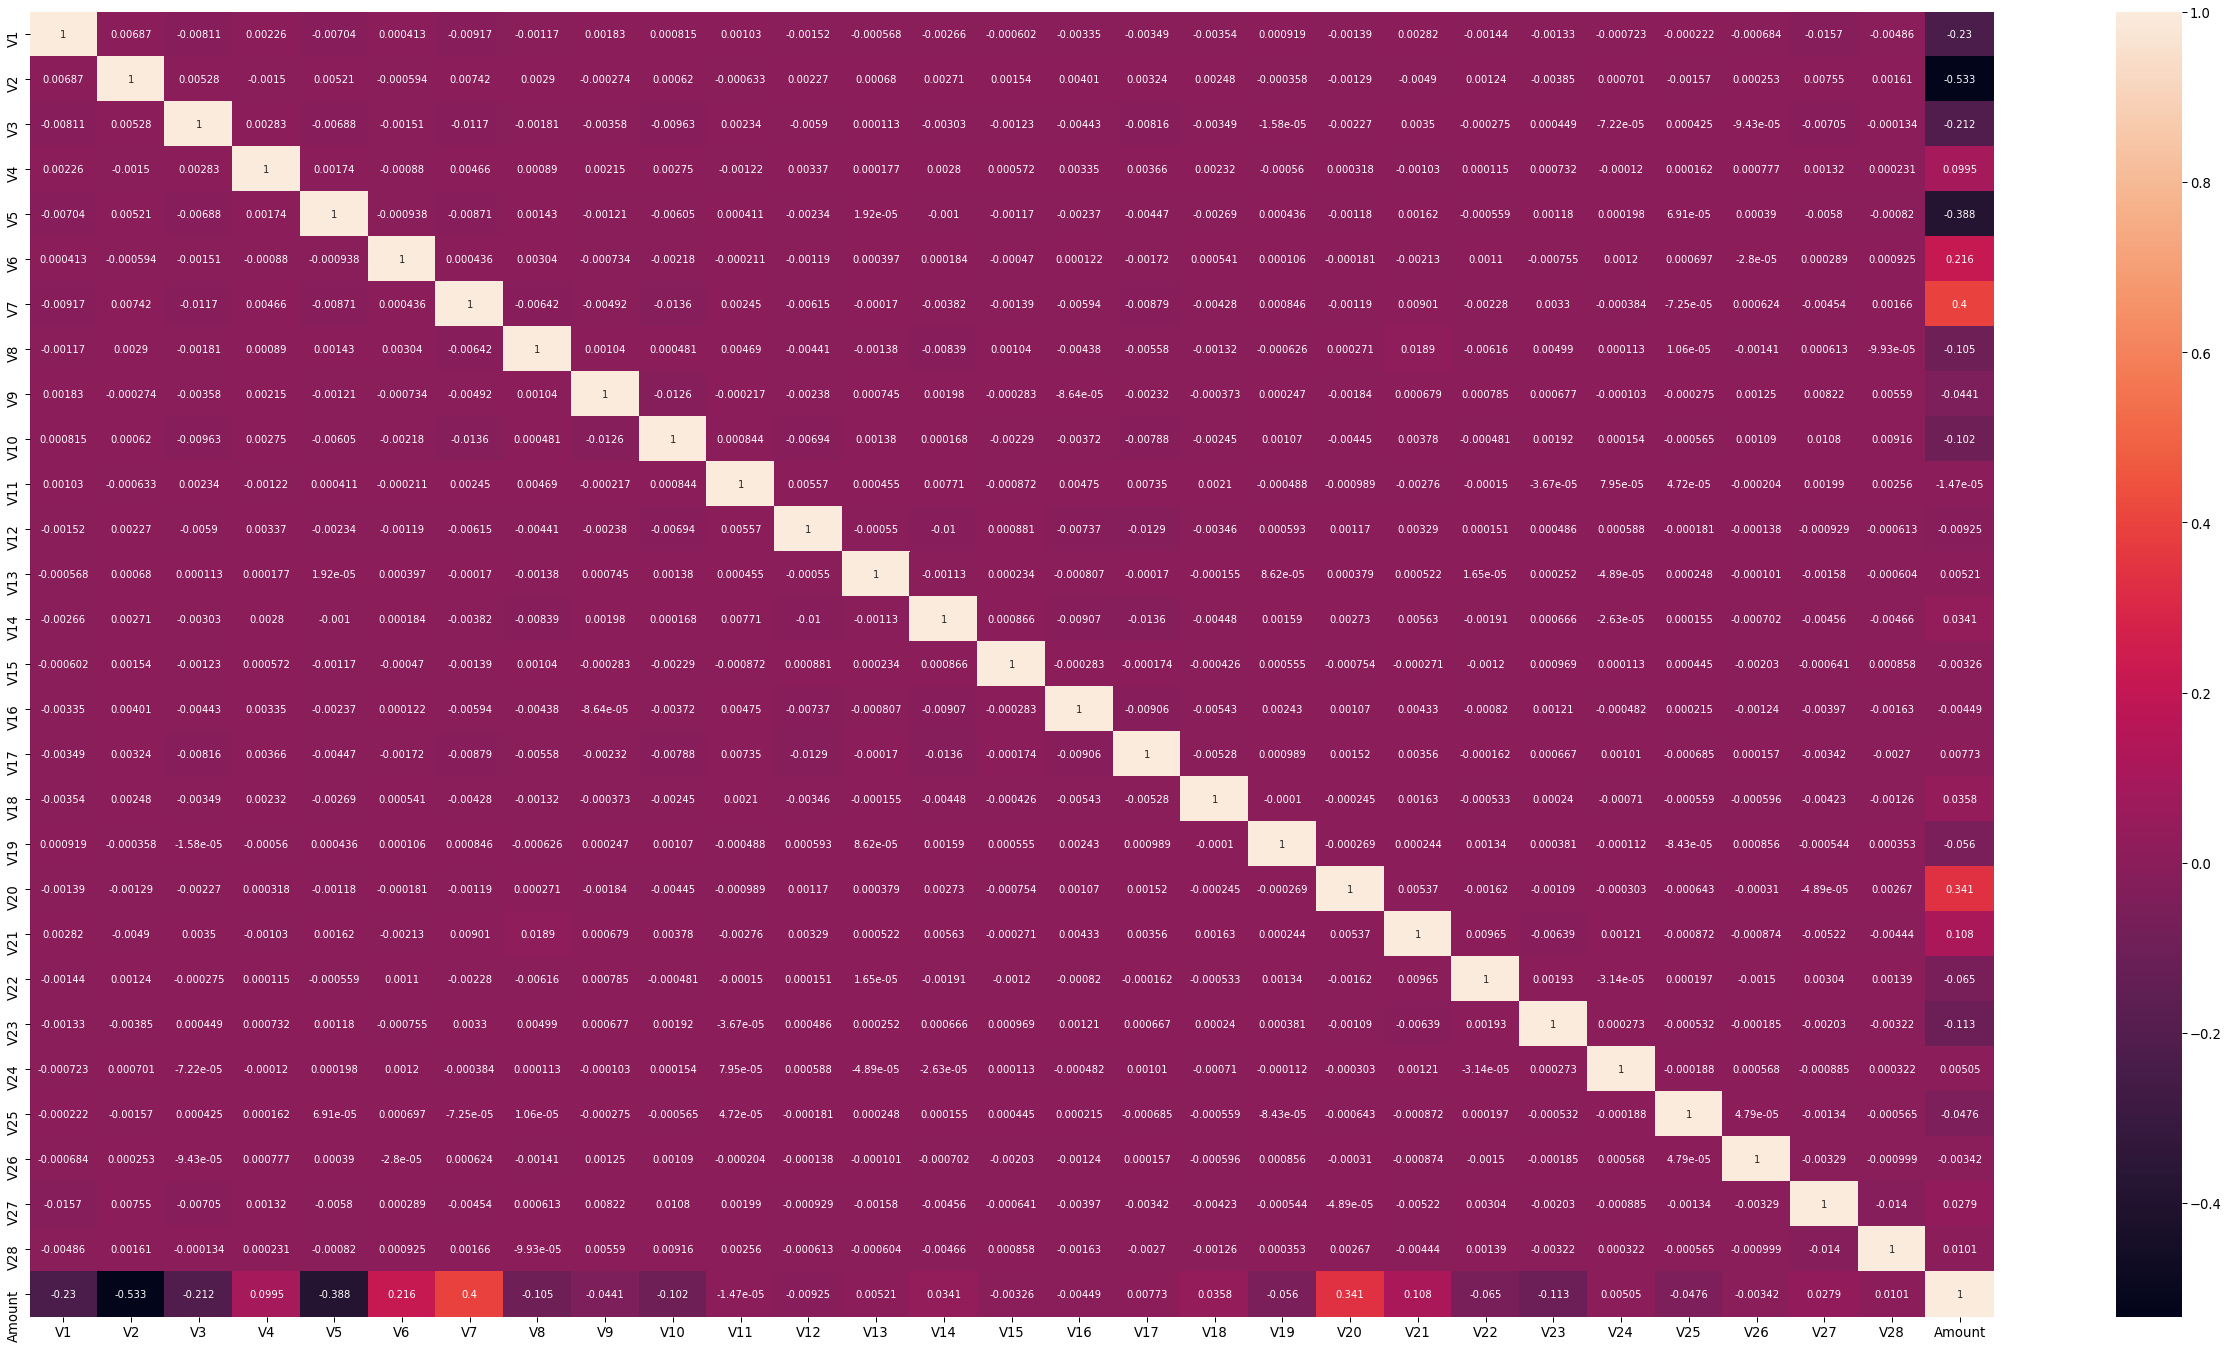

In [55]:
# calculate the correlation matrix
df.drop(['Time', 'Class'],axis=1, inplace=True)

corr = df.corr()

plt.subplots(figsize=(44,24))
# plot the heatmap
sns.heatmap(corr, xticklabels=corr.columns, yticklabels=corr.columns, annot=True, fmt='.3g')


In the HeatMap we can clearly see that most of the features do not correlate to other features but there are some features that either has a positive or a negative correlation with each other. For example, V2 and V5 are highly negatively correlated with the feature called Amount. We also see some correlation with V20 and Amount. This gives us a deeper understanding of the Data available to us.

Unblanced dataset

In [8]:
# information of all columns:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 283726 entries, 0 to 283725
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    283726 non-null  float64
 1   V1      283726 non-null  float64
 2   V2      283726 non-null  float64
 3   V3      283726 non-null  float64
 4   V4      283726 non-null  float64
 5   V5      283726 non-null  float64
 6   V6      283726 non-null  float64
 7   V7      283726 non-null  float64
 8   V8      283726 non-null  float64
 9   V9      283726 non-null  float64
 10  V10     283726 non-null  float64
 11  V11     283726 non-null  float64
 12  V12     283726 non-null  float64
 13  V13     283726 non-null  float64
 14  V14     283726 non-null  float64
 15  V15     283726 non-null  float64
 16  V16     283726 non-null  float64
 17  V17     283726 non-null  float64
 18  V18     283726 non-null  float64
 19  V19     283726 non-null  float64
 20  V20     283726 non-null  float64
 21  V21     28

Observing from the above columns information of the credit card dataframe created we can observe that about 31 parameters are available for about 280000 credit card transactions. The data obtained in this dataset was as a result of Principle Component Analysis (PCA) for dimensionality reduction performed in order to protect the sensitive information prevalent in the original dataset. The Class column indicates 0 for valid transaction and 1 for fraudulent transaction.

In [9]:
#For now I will look the "normal" columns
df[["Time","Amount","Class"]].describe()

,Time,Amount,Class
count,283726.000000,283726.000000,283726.000000
mean,94811.077600,88.472687,0.001667
std,47481.047891,250.399437,0.040796
min,0.000000,0.000000,0.000000
25%,54204.750000,5.600000,0.000000
50%,84692.500000,22.000000,0.000000
75%,139298.000000,77.510000,0.000000
max,172792.000000,25691.160000,1.000000


OBSERVATIONS:

1. Mean transaction is somewhere is 88 and standard deviation is around 250.

2. The median is 22 which is very less as compared to mean which signifies that there are outliers or our data is highly positive skewed which is effecting the amount and thus the mean.

3. The maximum transaction that was done is of 25,691 and minimum is 0.

4. The Time maximum is 172792 seconds which is equal to 172792/60*60 = 47.99 ~ 48 hours

First of all, I will explore through 3 different columns:

.Time

.Amount

.Class

Distribuition of Valid(0) and Frauds(1): 
0    283253
1       473
Name: Class, dtype: int64


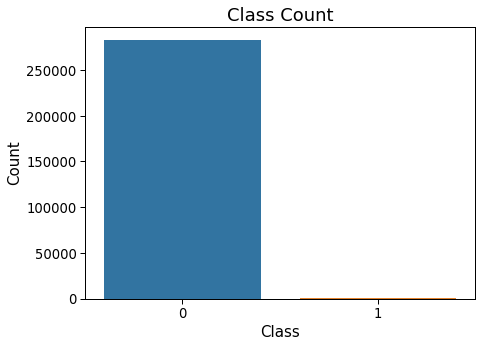

In [34]:
#Lets start looking the difference by Valid and Fraud transactions
print("Distribuition of Valid(0) and Frauds(1): ")
print(df["Class"].value_counts())

plt.figure(figsize=(7,5))
sns.countplot(df['Class'])
plt.title("Class Count", fontsize=18)
plt.xlabel("Class", fontsize=15)
plt.ylabel("Count", fontsize=15)
plt.show()

We have a clearly imbalanced data.

I will do some explore through the Time and Amount and then I will explore the V's Features, that are PCA's.

Time Features and some Feature Engineering

As our Time feature are in seconds we will transform it to minutes and hours to get a better understand of the patterns

In [35]:
df['Hour'] = df['Time'].apply(lambda x: np.ceil(float(x)/3600) % 24)


In [40]:
#Class vs Amount vs Hour
pd.pivot_table(
    columns='Class', 
    index='Hour', 
    values= 'Amount', 
    aggfunc='count', 
    data=df)

Class,0,1
Hour,,
0.0,10868,17
1.0,7639,6
2.0,4200,10
3.0,3258,48
4.0,3471,17
5.0,2180,23
6.0,2977,11
7.0,4074,9
8.0,7209,23


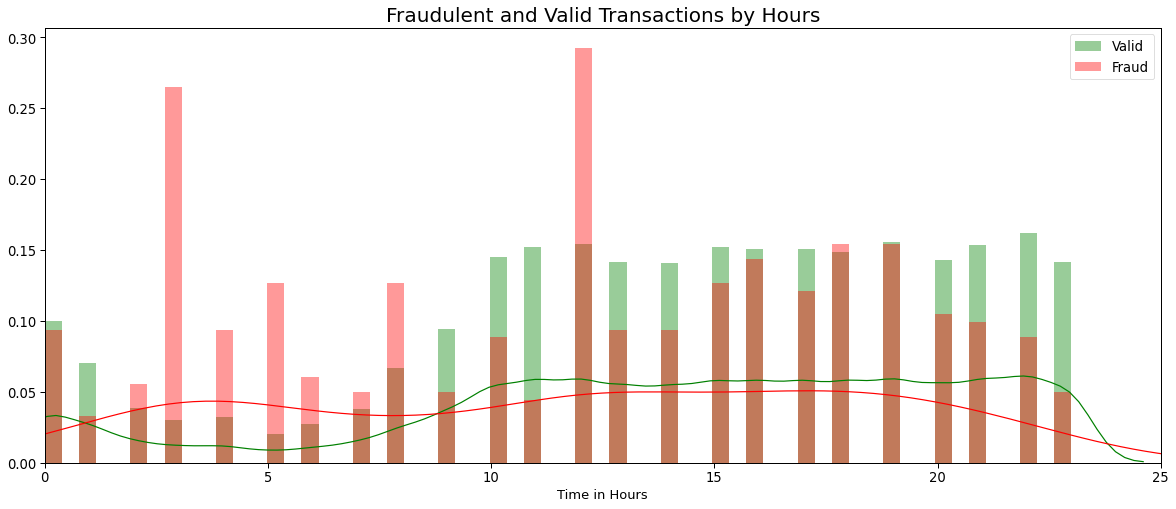

In [37]:
# Exploring the distribuition by Class types throught hours and minutes

plt.figure(figsize=(20,8))


sns.distplot(df[df['Class'] == 0]['Hour'], bins=60, color='g', label='Valid')
sns.distplot(df[df['Class'] == 1]["Hour"], bins=60, color='r', label='Fraud')

plt.title('Fraudulent and Valid Transactions by Hours', fontsize=20)

plt.xlabel("Time in Hours", fontsize=13)
plt.xlim([0,25])
plt.legend()
plt.show()

Fraudulent transactions by hour

As we can see ,the most fraudulent transactions happening at 3, 12 o'clock. Fraudulent transactions of the same account didn't happen consecutively.

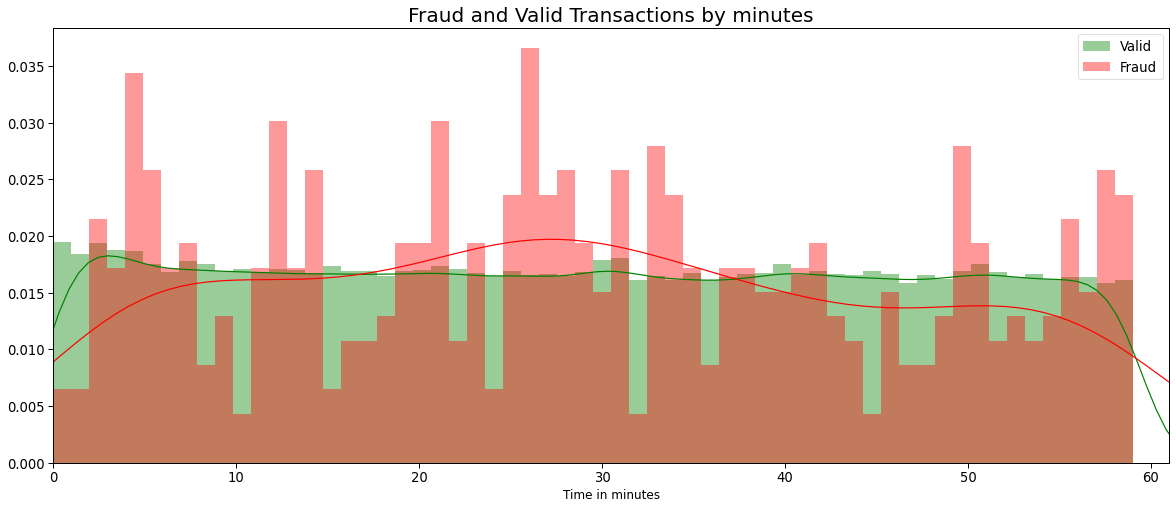

In [39]:
#Exploring the distribuition by Class types throught hours and minutes
timedelta = pd.to_timedelta(df['Time'], unit='s')
df['Time_min'] = (timedelta.dt.components.minutes).astype(int)

plt.figure(figsize=(20,8))

sns.distplot(df[df['Class'] == 0]["Time_min"], bins =60, color='g', label='Valid')
sns.distplot(df[df['Class'] == 1]["Time_min"], bins =60, color='r', label='Fraud')

plt.title('Fraud and Valid Transactions by minutes', fontsize=20)
plt.xlim([0,61])
plt.xlabel("Time in minutes", fontsize=12)
plt.legend()
plt.show()

The plots minutes doesn't have any interesting trend.

Let's see how time compares across fraudulent and valid transactions.

In [17]:
print ("Fraud")
print (df.Time[df.Class == 1].describe())
print ()
print ("Valid")
print (df.Time[df.Class == 0].describe())

Fraud
count       473.000000
mean      80450.513742
std       48636.179973
min         406.000000
25%       41203.000000
50%       73408.000000
75%      129095.000000
max      170348.000000
Name: Time, dtype: float64

Valid
count    283253.000000
mean      94835.058093
std       47475.550607
min           0.000000
25%       54233.000000
50%       84711.000000
75%      139308.000000
max      172792.000000
Name: Time, dtype: float64


Looking the statistics of our Amount class frauds and valid transactions

In [18]:
#To clearly the data of frauds and no frauds
df_fraud = df[df['Class'] == 1]
df_normal = df[df['Class'] == 0]

print("Fraud transaction statistics")
print(df["Amount"].describe())
print("\nValid transaction statistics")
print(df_normal["Amount"].describe())

Fraud transaction statistics
count    283726.000000
mean         88.472687
std         250.399437
min           0.000000
25%           5.600000
50%          22.000000
75%          77.510000
max       25691.160000
Name: Amount, dtype: float64

Valid transaction statistics
count    283253.000000
mean         88.413575
std         250.379023
min           0.000000
25%           5.670000
50%          22.000000
75%          77.460000
max       25691.160000
Name: Amount, dtype: float64


it's Interesting.

Using this informations I will filter the values to look for Amount by Class,
I will filter the "Valid" amounts by 5.000

Feature engineering to a better visualization of the values


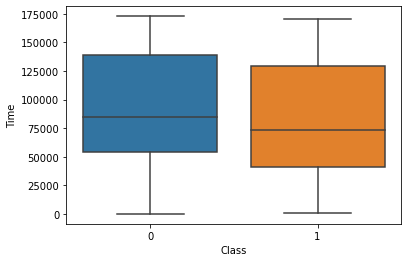

In [44]:
sns.boxplot(x = "Class", y = "Time", data = df)
plt.show()

Observations:

By looking at the above box plot we can say that both fraud & valid transactions occur throughout time and there is no distinction between them.

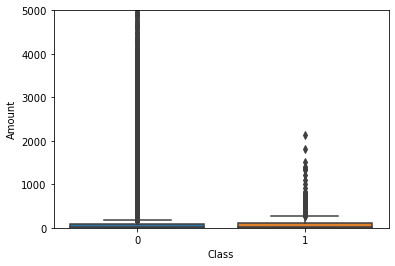

In [45]:
sns.boxplot(x = "Class", y = "Amount", data = df)
plt.ylim(0, 5000)
plt.show()

Observations:

From above box plot we can easily infer that there are no fraud transactions occur above the transaction amount of 3000. All of the fraud transactions have transaction amount less than 3000. However, there are many transactions which have a transaction amount greater than 3000 and all of them are valid.

Looking a scatter plot of the Time_min distribuition by Amount

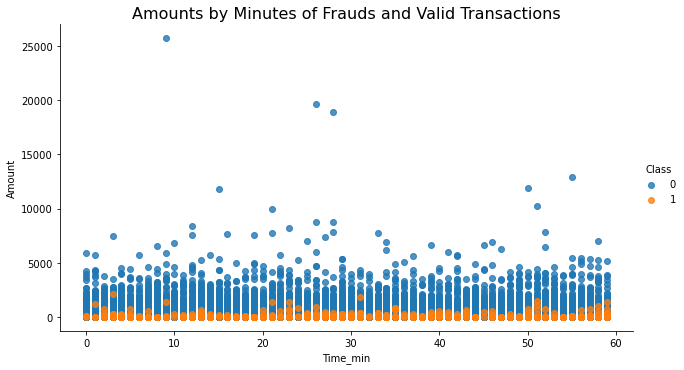

In [21]:
#Looking the Amount and time distribuition of FRAUD transactions
ax = sns.lmplot(y="Amount", x="Time_min", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Minutes of Frauds and Valid Transactions",fontsize=16)
plt.show()

Looking a scatter plot of the Time_hour distribuition by Amount

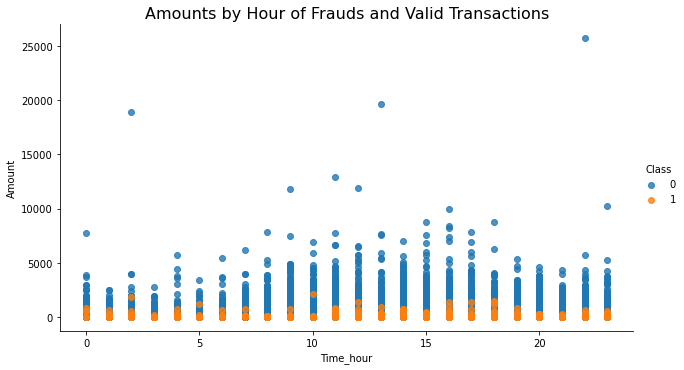

In [22]:
ax = sns.lmplot(y="Amount", x="Time_hour", fit_reg=False,aspect=1.8,
                data=df, hue='Class')
plt.title("Amounts by Hour of Frauds and Valid Transactions", fontsize=16)

plt.show()

Observations:

1.From the above two plots it is clearly visible that there are frauds only on the transactions which have transaction amount approximately less than 2500. Transactions which have transaction amount approximately above 2500 have no fraud.

2.As per with the time, the frauds in the transactions are evenly distributed throughout time

Now I will be visualizing all the features from the dataset on graphs

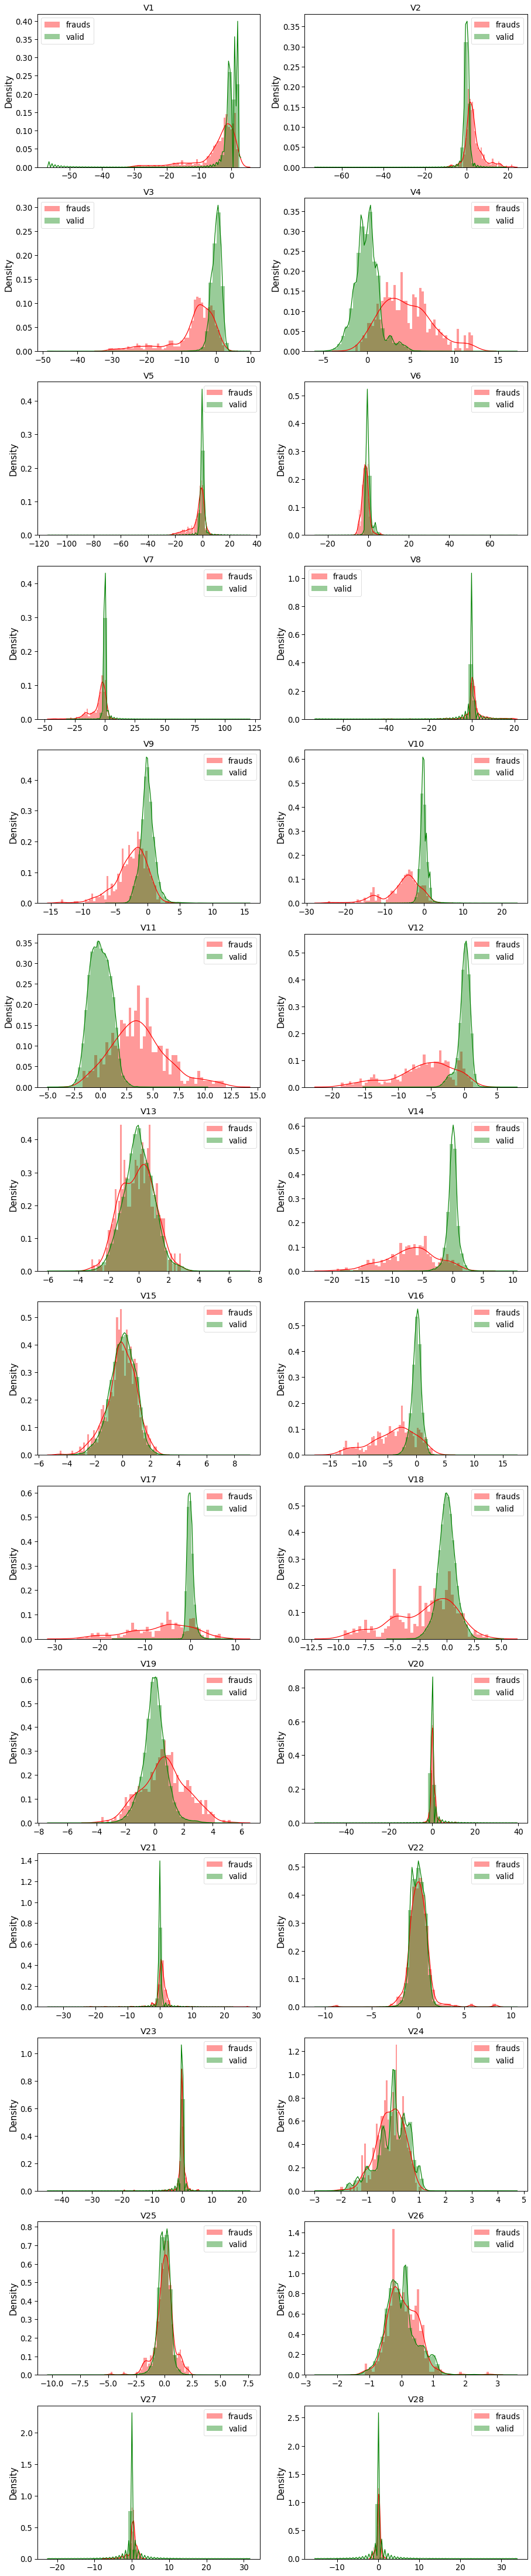

In [41]:
#Looking the V's features
columns = df.iloc[:,1:29].columns

frauds = df.Class == 1
valid = df.Class == 0

grid = gridspec.GridSpec(14, 2)
plt.figure(figsize=(15,20*4))

for n, col in enumerate(df[columns]):
    ax = plt.subplot(grid[n])
    sns.distplot(df[col][frauds], bins = 50, color='r',label='frauds') 
    sns.distplot(df[col][valid], bins = 50, color='g',label='valid') 
    ax.set_ylabel('Density')
    ax.set_title(str(col))
    ax.set_xlabel('')
    plt.legend()
plt.show()


Observing the histograms:

For some of the features we can observe a good selectivity in terms of distribution for the two values of Class: V4, V11 have clearly separated distributions for Class values 0 and 1(we have portion of data in the right side,skew for fraud in the right and for valid is 0 ). V12, V14, V18 are partially separated, V1, V2, V3, V10 have a quite distinct profile(because the most values cluster on the right and left side).  .V15,V22, V25, V26, V28 have similar profiles(they are overlap,impossible to make comparisons for two values of class.) 



Feature selections

In [43]:
#Looking the final df
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [174]:
# save 
df.to_csv(r'C:\Users\arna_mora\Springboard\unit 7\creditcard.csv', index = False)